# Student Performance Indicator - EDA

Life cycle of ML Project:
1. Understanding the problem statement
2. Data Collection
3. Data Quality Checks 
4. Exploratory Data Analysis
5. Data Preprocessing
6. Model training
7. Choose best model


### 1. Problem Statement:
Understand how student's performance is affected by factors like Gender, Ethinicity, Parental Level of Education, Lunch and test preparation course.

### 2. Data Collection:
- Source : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download
- 1000 rows and 8 columns

### 3. Data Quality Checks

#### Import required Libraries


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#### Import data

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
# checking the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
# check statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


From the above statistics we understand that:
1. means of math score, reading score and writing score are very close to each other - between 68.08 to 69.19
2. sd are close - between 14.6-15.19
3. minimum score for math is 0, reading is highest- 17

### 4. Data Exploration

In [10]:
# define numeric and categorical features
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('There are total {} numeric features : {}'.format(len(numeric_features), numeric_features))
print('There are total {} categorical features : {}'.format(len(categorical_features), categorical_features))

There are total 3 numeric features : ['math score', 'reading score', 'writing score']
There are total 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [11]:
# unique values in the categorical features

for feature in categorical_features:
    print('Unique categories in {} are: {}'.format(feature, df[feature].unique()))

Unique categories in gender are: ['female' 'male']
Unique categories in race/ethnicity are: ['group B' 'group C' 'group A' 'group D' 'group E']
Unique categories in parental level of education are: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique categories in lunch are: ['standard' 'free/reduced']
Unique categories in test preparation course are: ['none' 'completed']


In [12]:
# checking number of students getting full marks in each subject

n_math_full, n_reading_full, n_writing_full = df[df['math score'] == 100]['math score'].count(), df[df['reading score'] == 100]['reading score'].count(), df[df['writing score'] == 100]['writing score'].count()

print(f'Number of students with full marks in Maths : {n_math_full}')
print(f'Number of students with full marks in Reading : {n_reading_full}')
print(f'Number of students with full marks in Writing : {n_writing_full}')

Number of students with full marks in Maths : 7
Number of students with full marks in Reading : 17
Number of students with full marks in Writing : 14


In [13]:
# find students with less than passing marks considering passing marks as 33, ie, fail


n_math_fail, n_reading_fail, n_writing_fail = df[df['math score'] < 33]['math score'].count(), df[df['reading score'] < 33]['reading score'].count(), df[df['writing score']< 33]['writing score'].count()

print(f'Number of students who failed Maths : {n_math_fail}')
print(f'Number of students who failed Reading : {n_reading_fail}')
print(f'Number of students who failed Writing : {n_writing_fail}')

Number of students who failed Maths : 19
Number of students who failed Reading : 11
Number of students who failed Writing : 12


We noticed that more studnets failed maths as compared to the other two subjects
and more students scored perfect marks in Reading than other. 

In [14]:
# make a avg score column showing avg performance across all sections

df['average'] =( df['math score'] + df['reading score'] + df['writing score'] )/ 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


### Visualization

#### Visualize average score distribution
- Histogram
- Kernel Distribution Function(KDE)


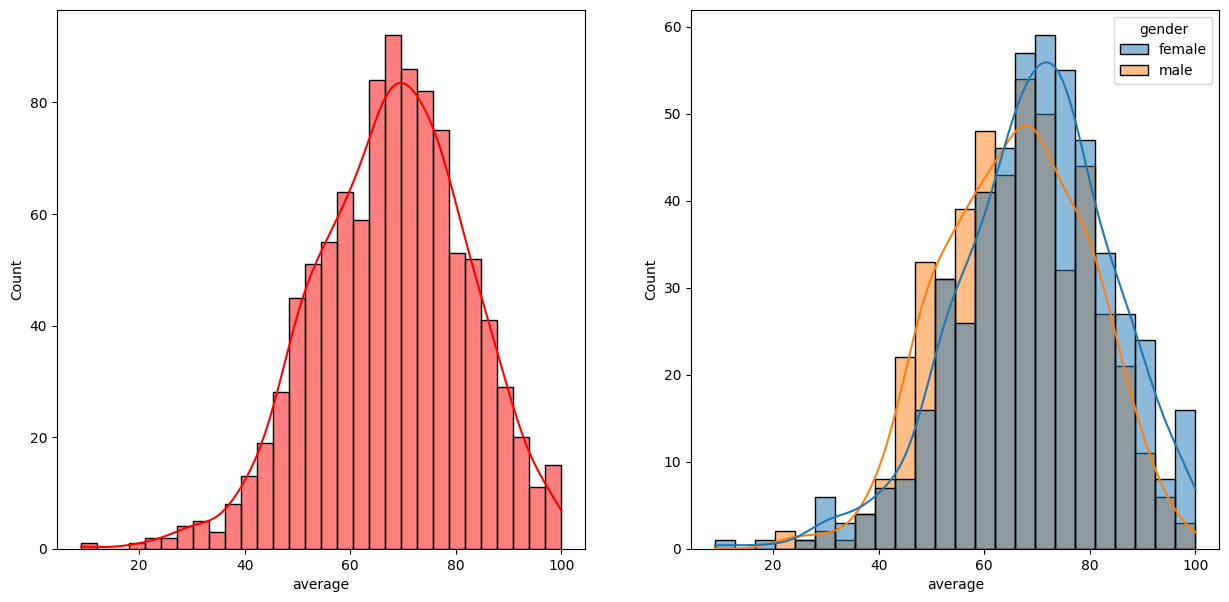

In [15]:
# create a figure with 1 row and 2 columns of subplots, figsize=(15, 7) argument specifies the width and height of the figure in inches
# fig represents the entire figure, while axs is an array-like object containing the individual subplots
fig, axs = plt.subplots(1,2, figsize = (15, 7))

plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

Female students tend to perform better than the male counterparts

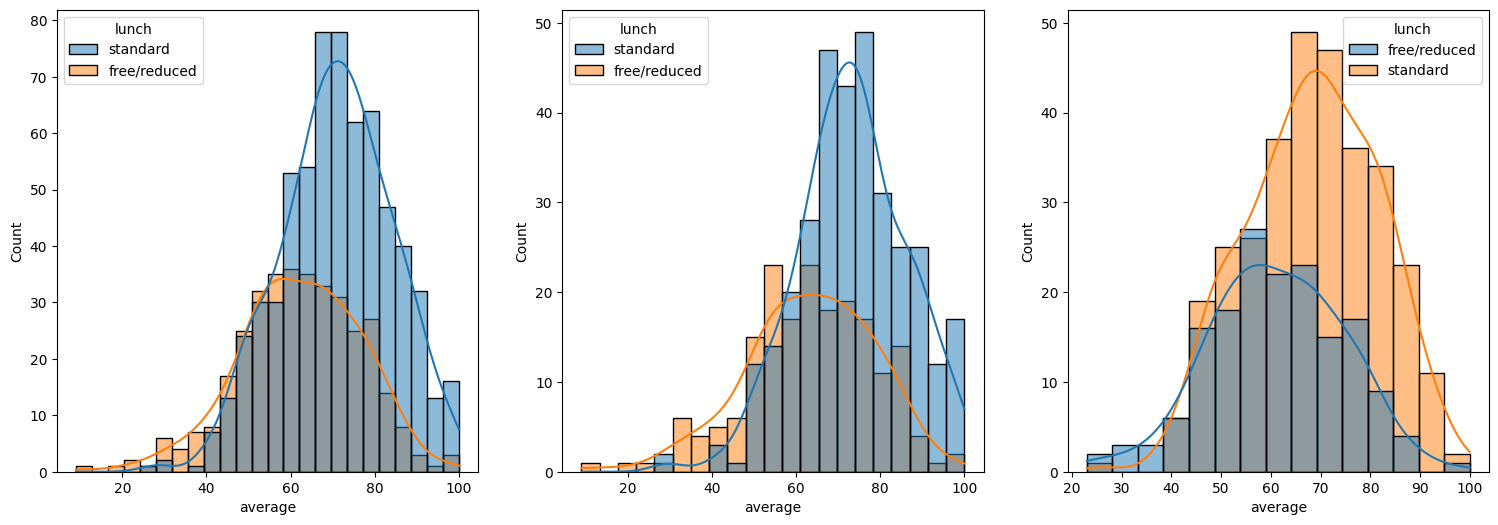

In [16]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x = 'average', kde = True, hue = 'lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data =  df[df.gender == 'male'], x = 'average', kde = True, hue = 'lunch')
plt.show()

standard lunch helps students perform better in exams


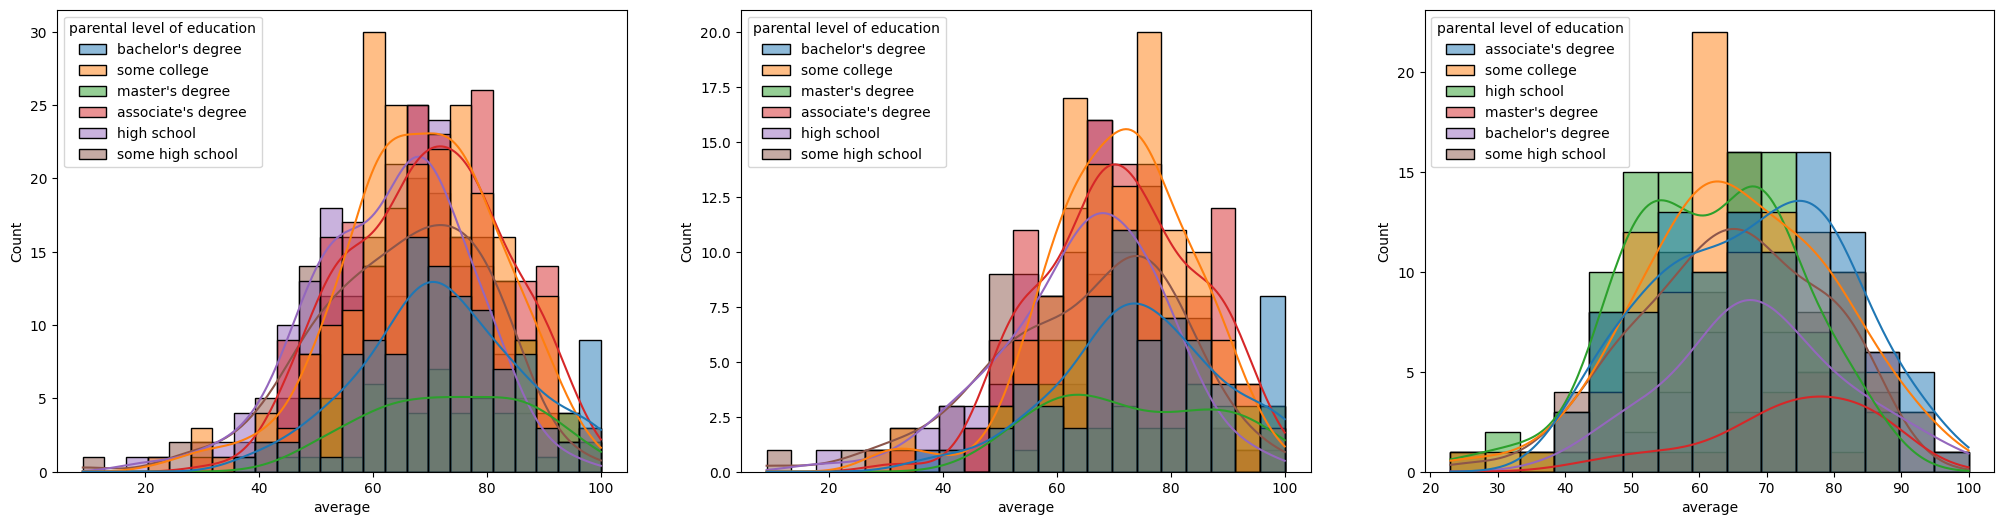

In [17]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data = df, x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(132)
sns.histplot(data = df[df.gender == 'female'], x = 'average', kde = True, hue = 'parental level of education')
plt.subplot(133)
sns.histplot(data =  df[df.gender == 'male'], x = 'average', kde = True, hue = 'parental level of education')
plt.show()

male student's parent have some sort of education backgroud, but that is not the case in female student's parent. So in case of males, there might be some influence but not in case of female students.

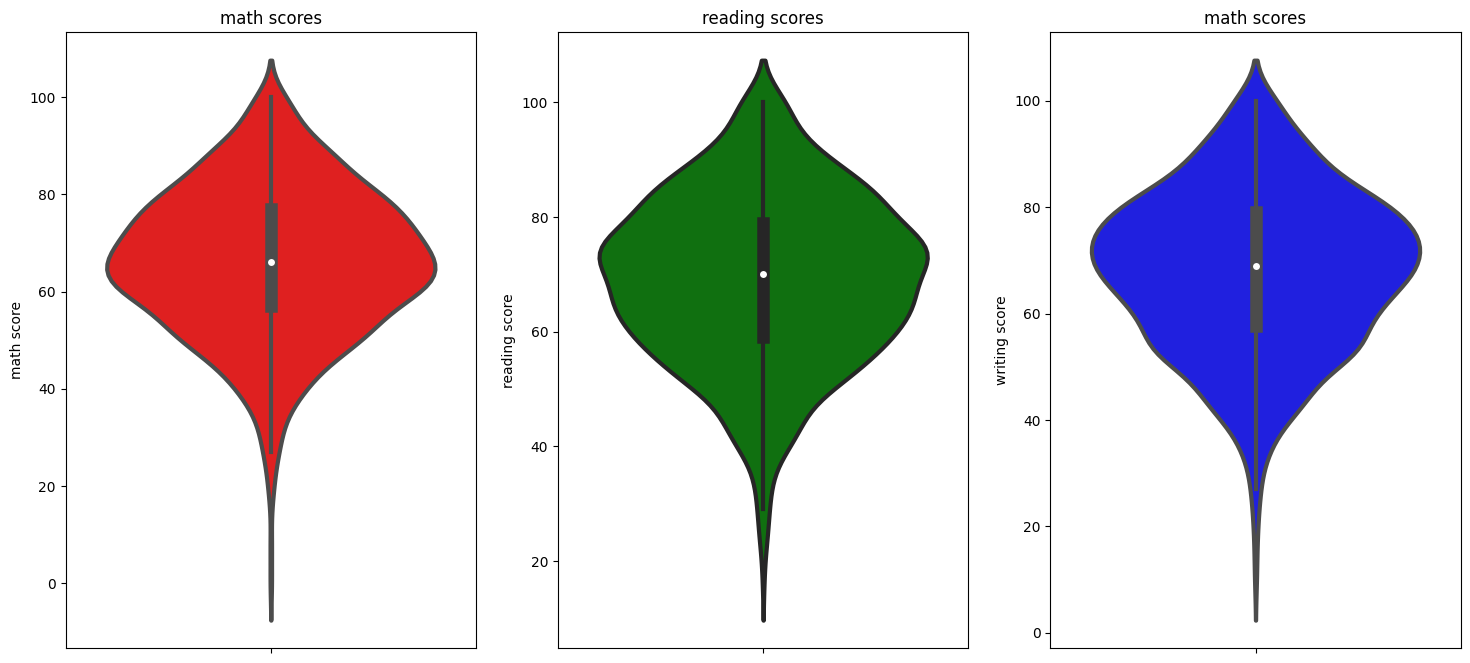

In [18]:
# maximum score of students in all three subjects

plt.figure(figsize = (18,8))
plt.subplot(131)
plt.title('math scores')
sns.violinplot(y = 'math score', data = df, color = 'r', linewidth = 3)
plt.subplot(132)
plt.title('reading scores')
sns.violinplot(y = 'reading score', data = df, color = 'g', linewidth = 3)
plt.subplot(133)
plt.title('math scores')
sns.violinplot(y = 'writing score', data = df, color = 'b', linewidth = 3)
plt.show()

violin plots show us that most of the studnets score between 60-80 in maths but 50-80 in rest

#### Multivariate analysis using pieplot

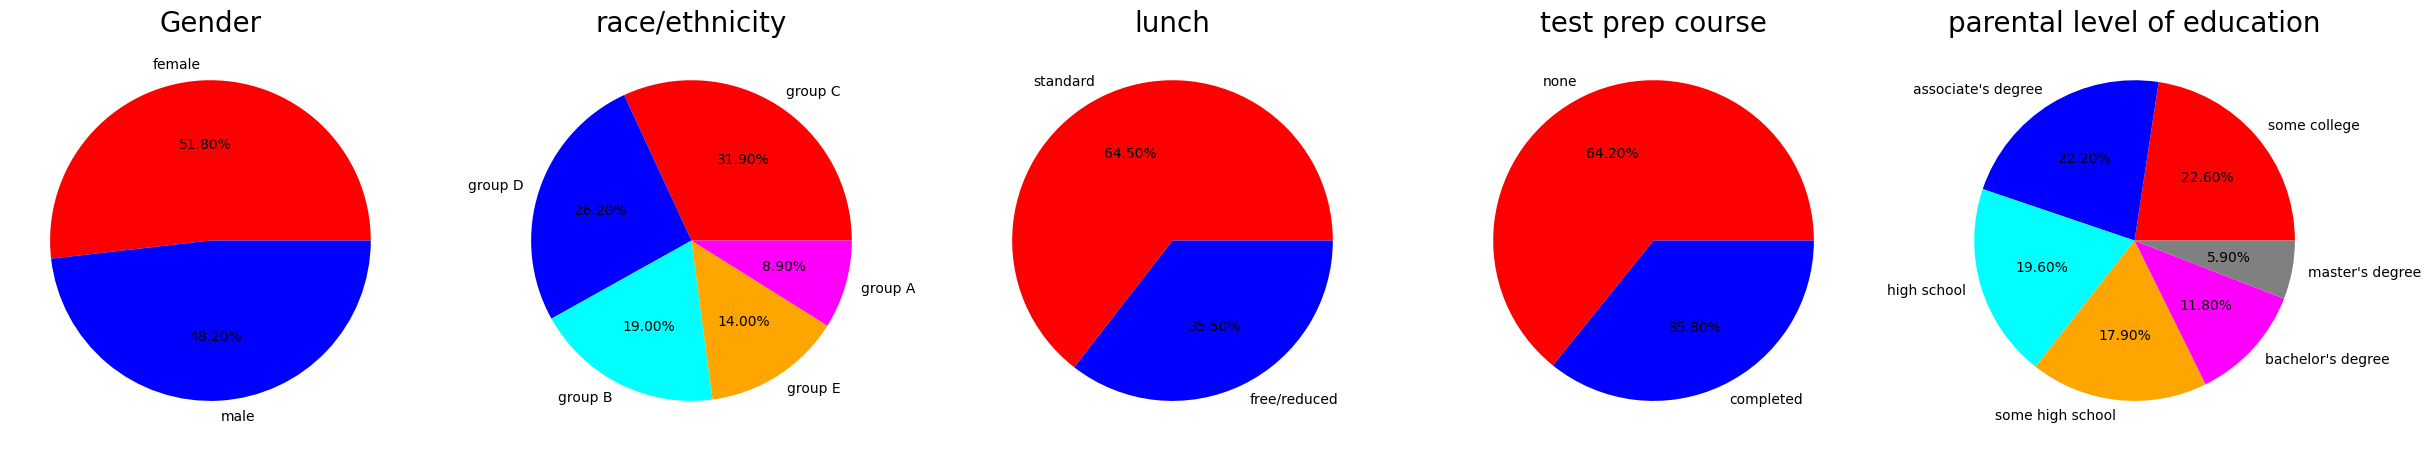

In [45]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(151)
size = df['gender'].value_counts()
labels = size.index
colors = ['red', 'blue']

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(152)
size = df['race/ethnicity'].value_counts()
labels = size.index
colors = ['red', 'blue', 'cyan', 'orange', 'magenta']

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('race/ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(153)
size = df['lunch'].value_counts()
labels =  size.index
colors = ['red', 'blue']

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')

plt.subplot(154)
size = df['test preparation course'].value_counts()
labels =  size.index
colors = ['red', 'blue']

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('test prep course', fontsize = 20)
plt.axis('off')

plt.subplot(155)
size = df['parental level of education'].value_counts()
labels =  size.index
colors = ['red', 'blue', 'cyan', 'orange', 'magenta', 'grey']

plt.pie(size, colors = colors, labels = labels, autopct = '%.2f%%')
plt.title('parental level of education', fontsize = 20)
plt.axis('off')

plt.show()


#### Observations:
1. Gender: number of females and males is balanced
2. number of students maximum in group C
3. Maximum number of students availing standard lunch
4. Most of the students don't take prep course
5. Most student's parents have some college degree and very few have master's degree

#### Feature - wise visualization

#### Gender
- Distribution?
- Does gender have any impact on the student's performance?

##### Univariate analysis - Distribution?

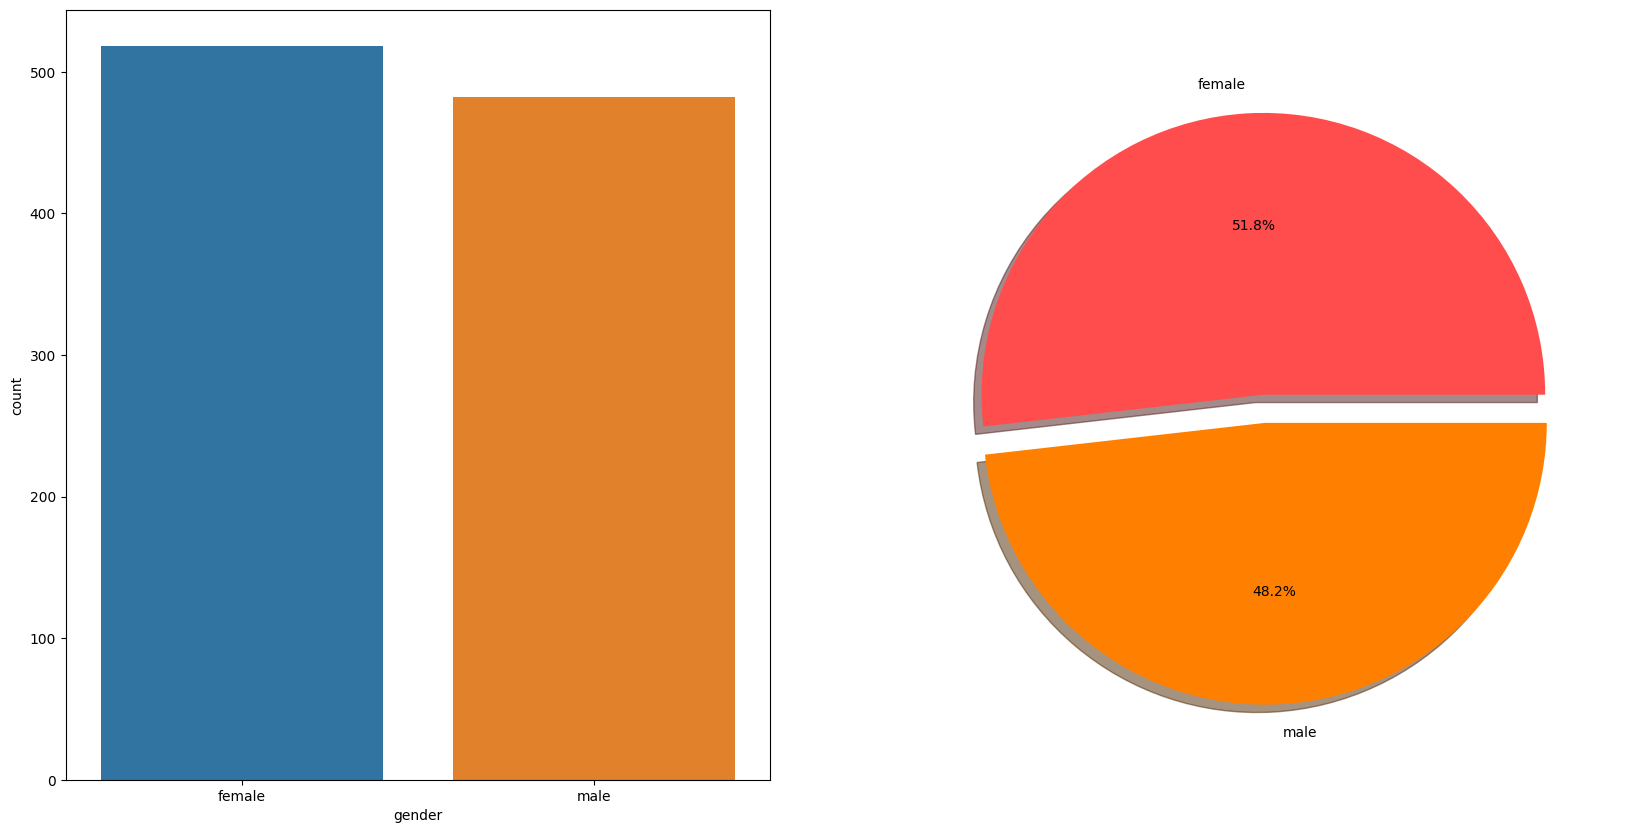

In [42]:
# Gender
fig,axs=plt.subplots(1,2,figsize=(20,10))

plt.subplot(121)
sns.countplot(x=df['gender'],data=df)

plt.subplot(122)   
plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Bivariate analysis - Does gender have influence on student's performance?

In [56]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


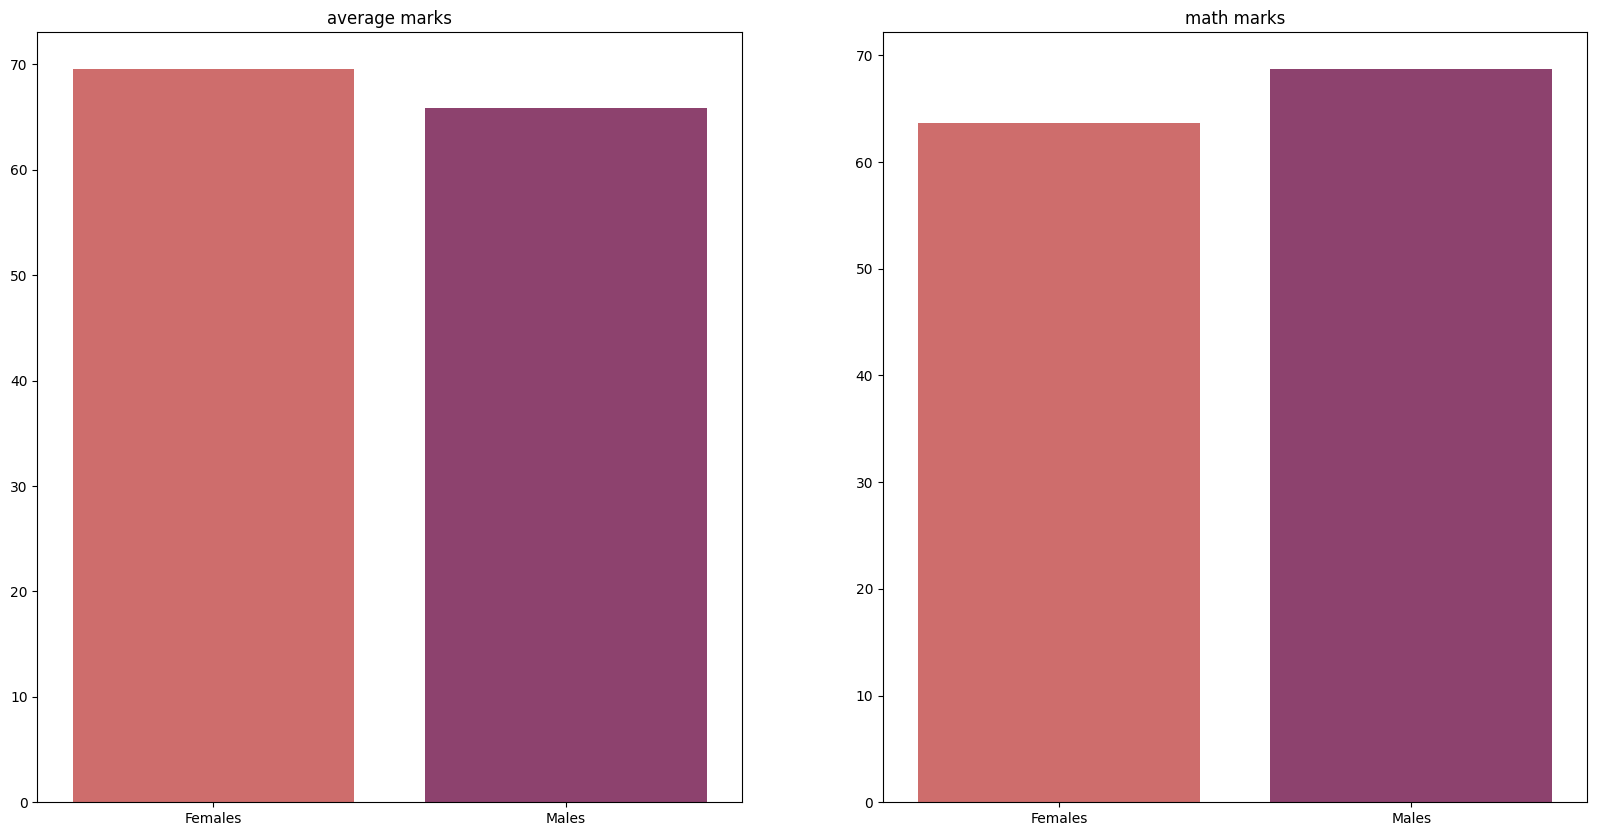

In [99]:
fig, axs = plt.subplots(1,2,figsize=(20, 10))


X = ['Females', 'Males']
average_means = [gender_group['average'][0], gender_group['average'][1]]
math_means = [gender_group['math score'][0], gender_group['math score'][1]]

X_axis = np.arange(len(X))
  
plt.subplot(121)

sns.barplot(x = X, y = average_means, palette = 'flare')
plt.title('average marks')
plt.subplot(122)
sns.barplot(x = X, y = math_means, palette = 'flare')
plt.title('math marks')
plt.show()


On average, females have better overall score than males whereas males have scored better than females in males.

##### Race/ethnicity column
- Distrubition
- Impact on student's performance

##### Univariate

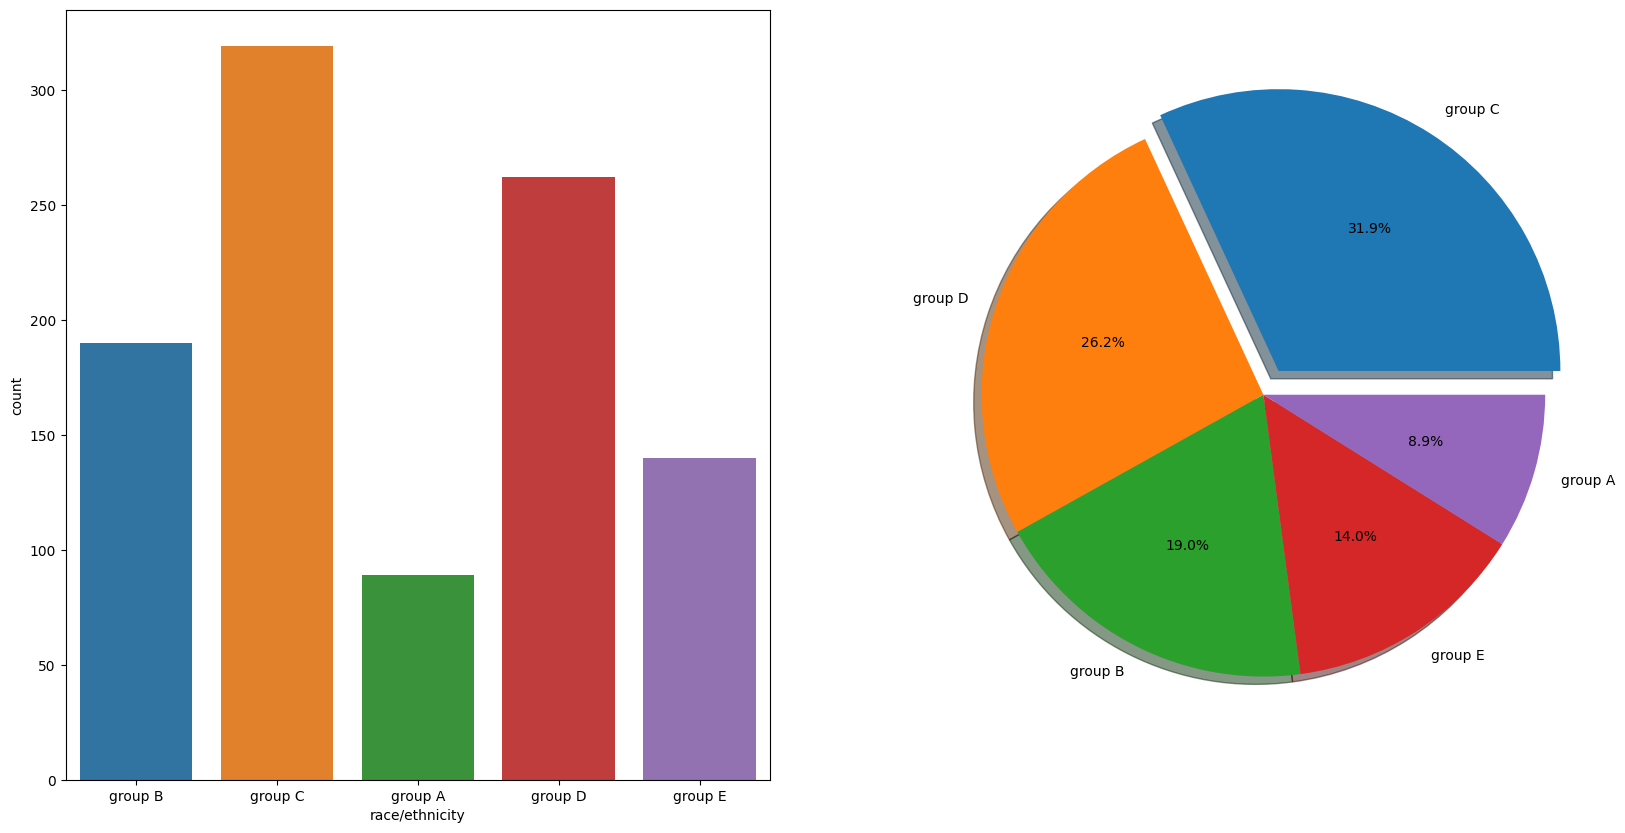

In [73]:
# Gender
fig,axs=plt.subplots(1,2,figsize=(20,10))

plt.subplot(121)
sns.countplot(x=df['race/ethnicity'],data=df)

plt.subplot(122)   
plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1, 0, 0, 0, 0],autopct='%1.1f%%',shadow=True)
plt.show()

##### Bivariate analysis

In [74]:
race_group = df.groupby('race/ethnicity').mean(numeric_only=True)
race_group

,math score,reading score,writing score,average
race/ethnicity,,,,
group A,61.629213,64.674157,62.674157,62.992509
group B,63.452632,67.352632,65.600000,65.468421
group C,64.463950,69.103448,67.827586,67.131661
group D,67.362595,70.030534,70.145038,69.179389
group E,73.821429,73.028571,71.407143,72.752381


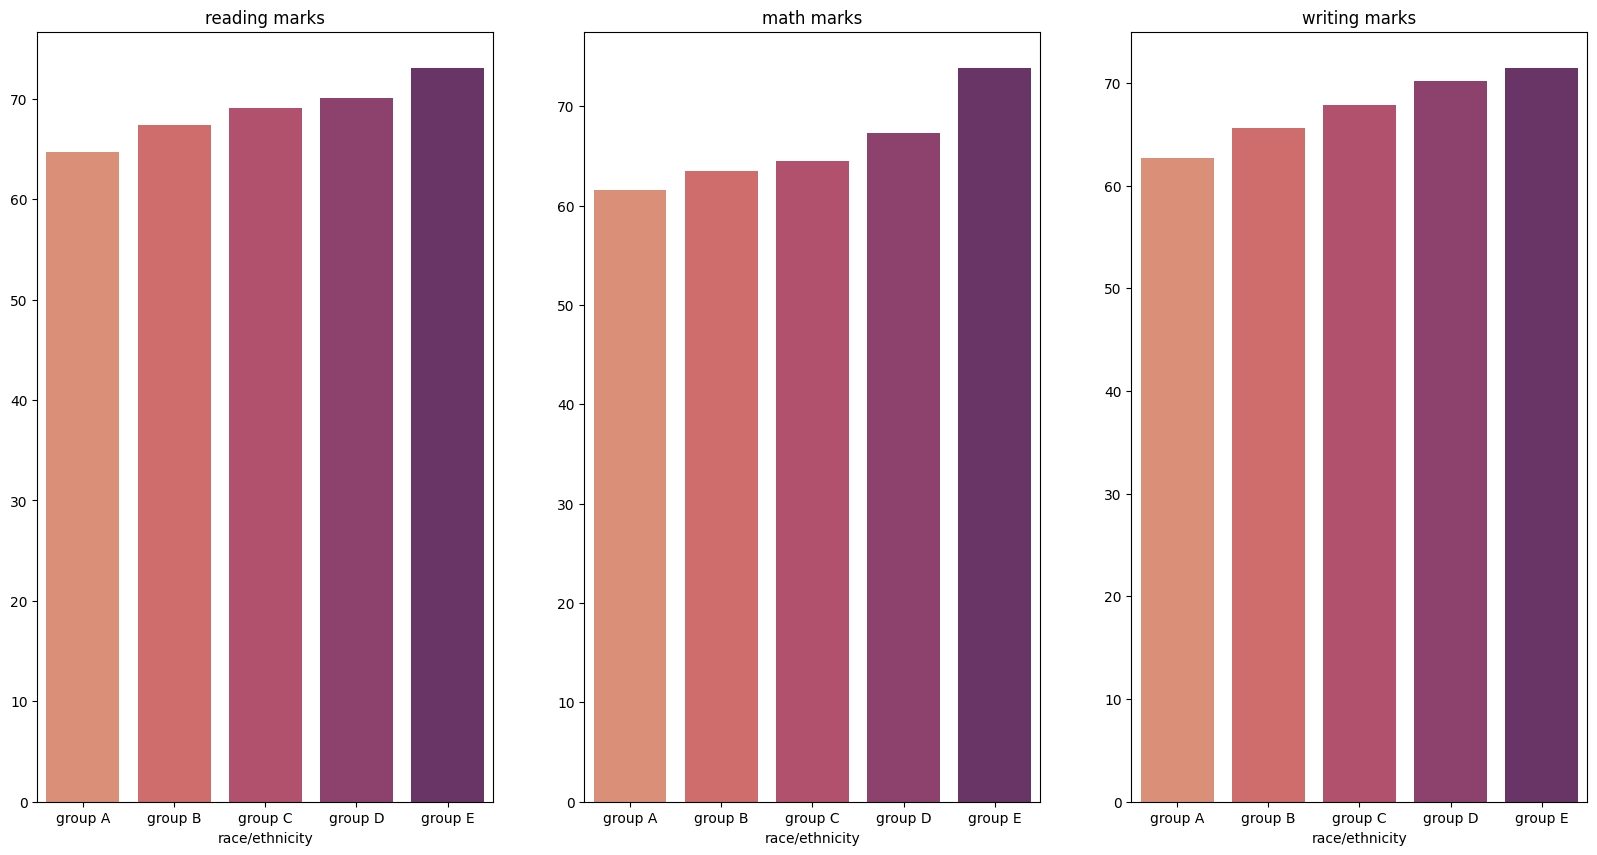

In [103]:
fig, axs = plt.subplots(1,3,figsize=(20, 10))


X =  race_group['reading score'].index
# reading_means = [race_group['reading score'][0], race_group['reading score'][1]]
reading_means = race_group['reading score'].values
math_means = [race_group['math score'][0], race_group['math score'][1]]
writing_means = [race_group['writing score'][0], race_group['writing score'][1]]

 
plt.subplot(131)
sns.barplot(x = race_group['reading score'].index, y = race_group['reading score'].values, palette = 'flare')
plt.title('reading marks')
plt.subplot(132)
sns.barplot(x = race_group['math score'].index, y = race_group['math score'].values, palette = 'flare')
plt.title('math marks')
plt.subplot(133)
sns.barplot(x = race_group['writing score'].index, y = race_group['writing score'].values, palette = 'flare')
plt.title('writing marks')
plt.show()


Group E has scored the highest average and group A has scored the least average marks.

##### Does parental education have an impact?

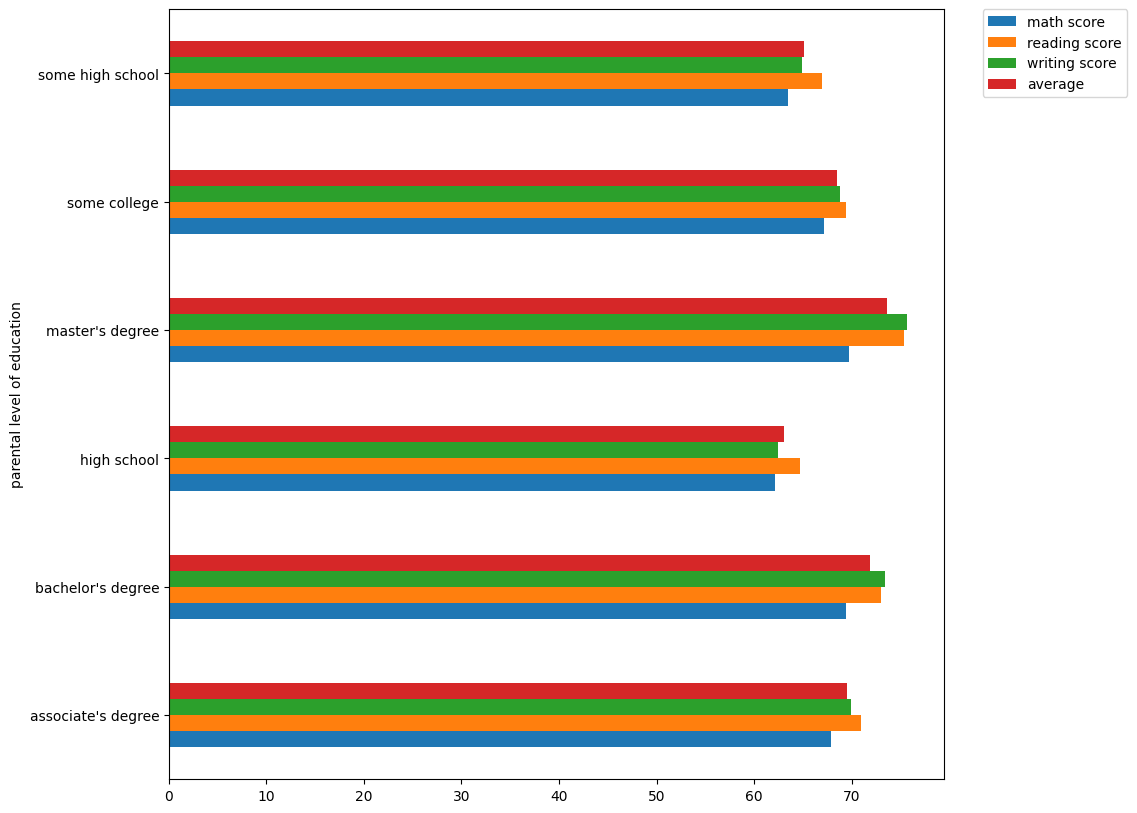

In [106]:
df.groupby('parental level of education').mean(numeric_only= True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

##### Lunch

- common lunch?
- does lunch influence performance?


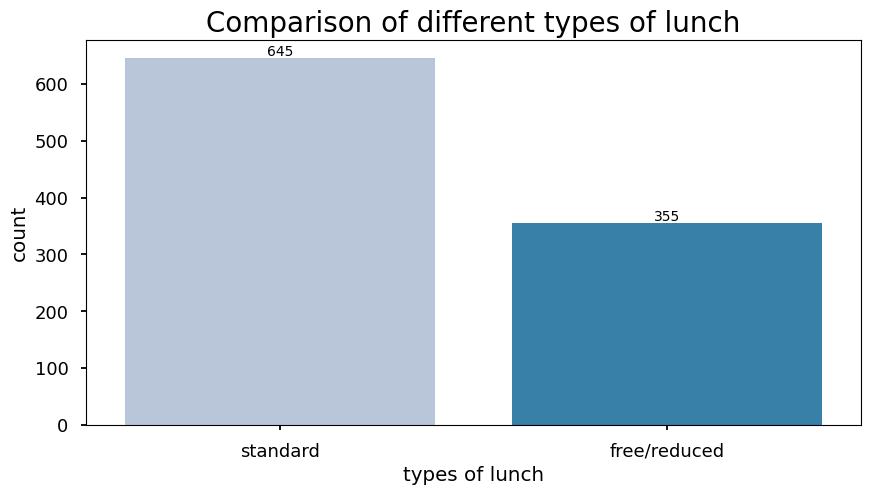

In [139]:
fig, axs = plt.subplots(figsize = (10,5))


sns.countplot(x = df['lunch'], data = df, palette = 'PuBu')
for container in axs.containers:
    axs.bar_label(container,color='black')  
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

maximum students have standard lunch.

In [140]:
# bivariate analysis - lunch intake has association with performance

lunch_group = df.groupby('lunch').mean(numeric_only = True)
lunch_group

,math score,reading score,writing score,average
lunch,,,,
free/reduced,58.921127,64.653521,63.022535,62.199061
standard,70.034109,71.654264,70.823256,70.837209


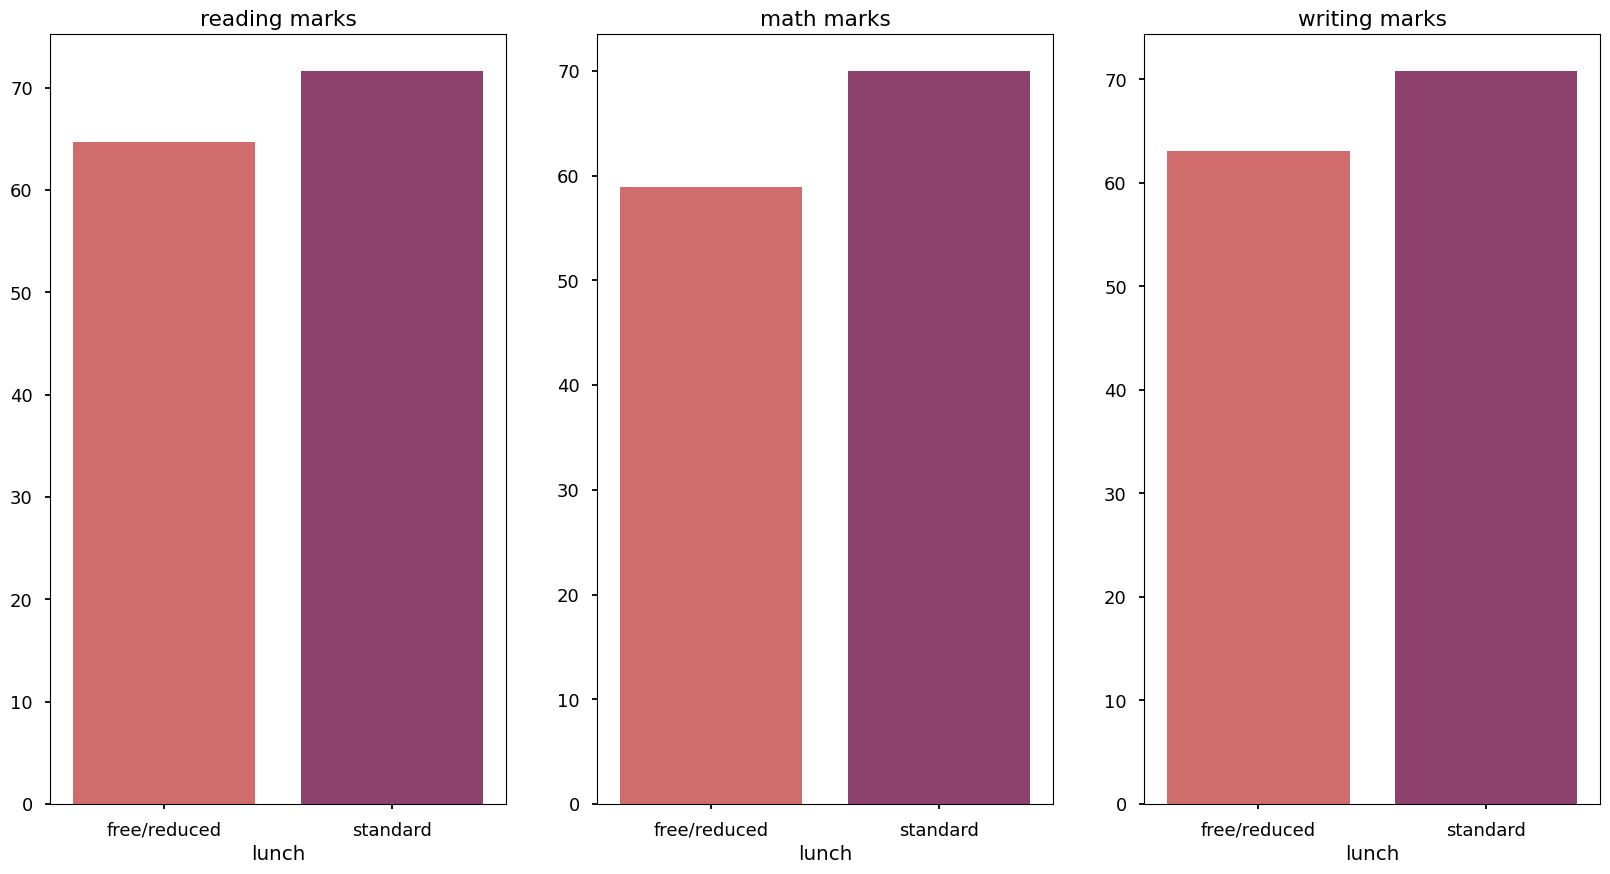

In [142]:
fig, axs = plt.subplots(1,3,figsize=(20, 10))


 
plt.subplot(131)
sns.barplot(x = lunch_group['reading score'].index, y = lunch_group['reading score'].values, palette = 'flare')
plt.title('reading marks')
plt.subplot(132)
sns.barplot(x = lunch_group['math score'].index, y = lunch_group['math score'].values, palette = 'flare')
plt.title('math marks')
plt.subplot(133)
sns.barplot(x = lunch_group['writing score'].index, y = lunch_group['writing score'].values, palette = 'flare')
plt.title('writing marks')
plt.show()


students with standard food scored more.

#### Test Prep course

<Axes: xlabel='test preparation course', ylabel='writing score'>

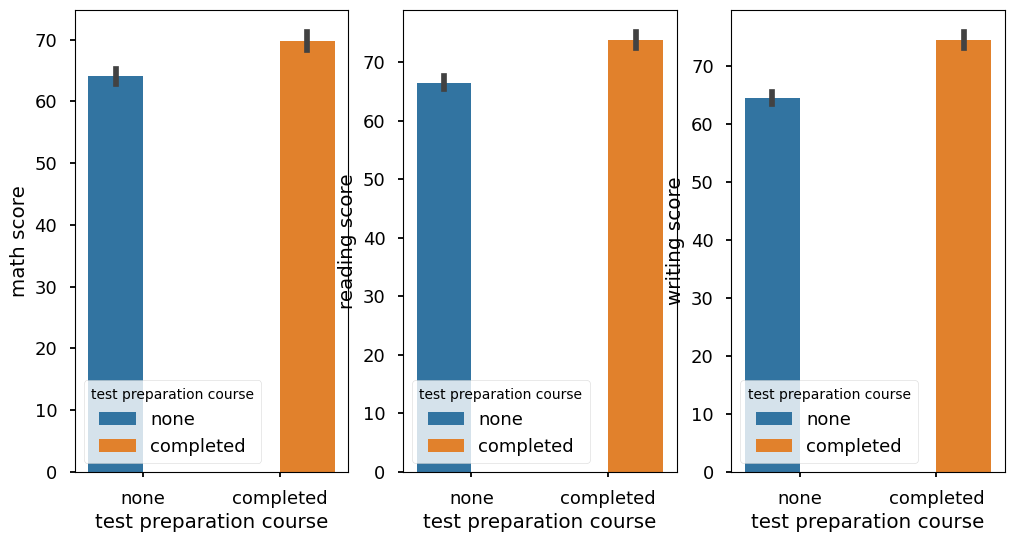

In [145]:
plt.figure(figsize=(12,6))
plt.subplot(131)
sns.barplot (x=df['test preparation course'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(132)
sns.barplot (x=df['test preparation course'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(133)
sns.barplot (x=df['test preparation course'], y=df['writing score'], hue=df['test preparation course'])

students who completed the course scored more in all the subjects, but not a significant differnece

### Checking Outliers

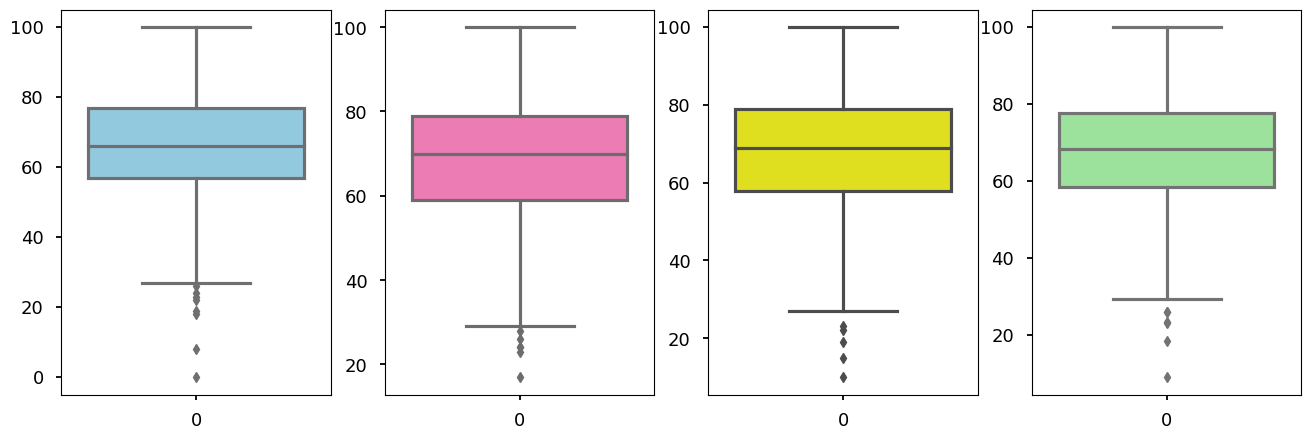

In [146]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Multivariate analysis

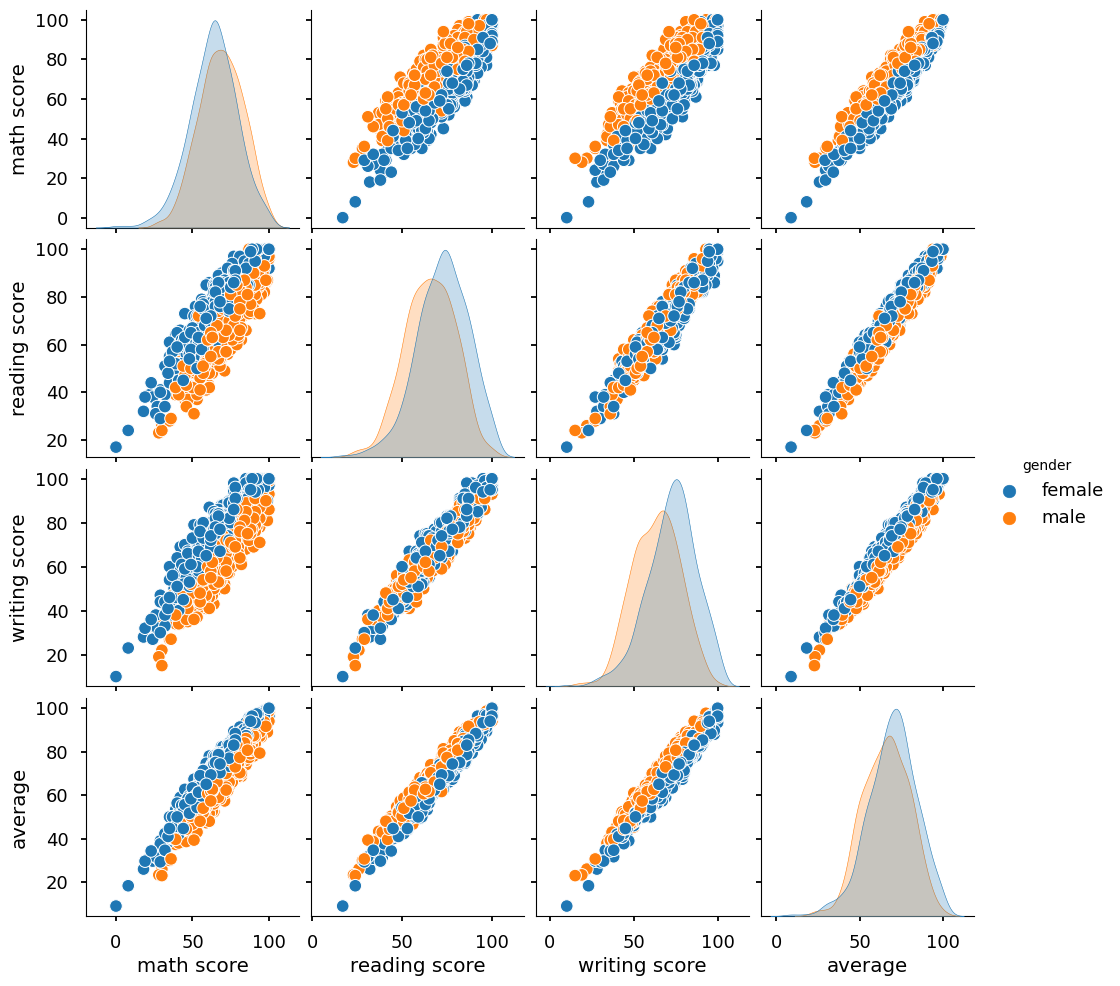

In [147]:

sns.pairplot(df,hue = 'gender')
plt.show()

All score increase linearly that is, if someoine scored high in math, tends to relatively score higher in other subjects too.